Assumptions in Multilinear Regression

1. Linearity: The relationship between the predictors and the response is linear.

2. Independence: Observations are independent of each other.

3. Homoscedasticity: The residuals (Y - Y_hat)) exhibit constant variance at all levels of the predictor.

4. Normal Distribution of Errors: The residuals of the model are normally distributed.

5. No multicollinearity: The independent variables should not be too highly correlated with each other.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as snf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [3]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
Description of columns
MGP : Milege of car(mile per gallon) (This is Y-column to be predicted)
HP : Horse Power of the car (X1 column)
VOL: Volume of the car (size) (X2 column)
SP: Top speed of the car (Miles per Hour) (X3 column)
WT: Weight of the car (Pounds) (X4 Column

SyntaxError: invalid syntax (174275091.py, line 1)

In [12]:
#Rearrange the columns
cars = pd.DataFrame(cars, columns=["HP","VOL","SP","WT","MGP"])
cars.head()

,HP,VOL,SP,WT,MGP
0,49,89,104.185353,28.762059,NaN
1,55,92,105.461264,30.466833,NaN
2,55,92,105.461264,30.193597,NaN
3,70,92,113.461264,30.632114,NaN
4,53,92,104.461264,29.889149,NaN


In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MGP     0 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
OBSERVATIONS
- There are no missing values
- There are 81 observations (81 different cars data)
- The data types of the columns are also relevant and valid

In [10]:
cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

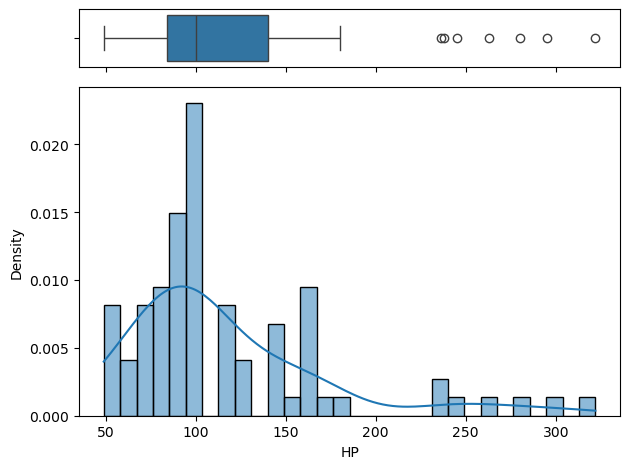

In [16]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Creating a boxplot
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='') # Remove x Label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

# Adjust Layout
plt.tight_layout()
plt. show()

In [ ]:
OBSERVATIONS FROM BOXPLOT AND HISTOGRAMS
- There are some extreme values (outliers) observed in towards the right tail of sp and hp distributions
- In vol and wt columns, a few outliers are observed in both tails of their distributions
- The extreme values of cars data may have come from the specially designed nature of cars
- As this is multi_dimensional data,the outliers with respect to spatial dimensions may have to be consideres while building the regression model

In [18]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MGP


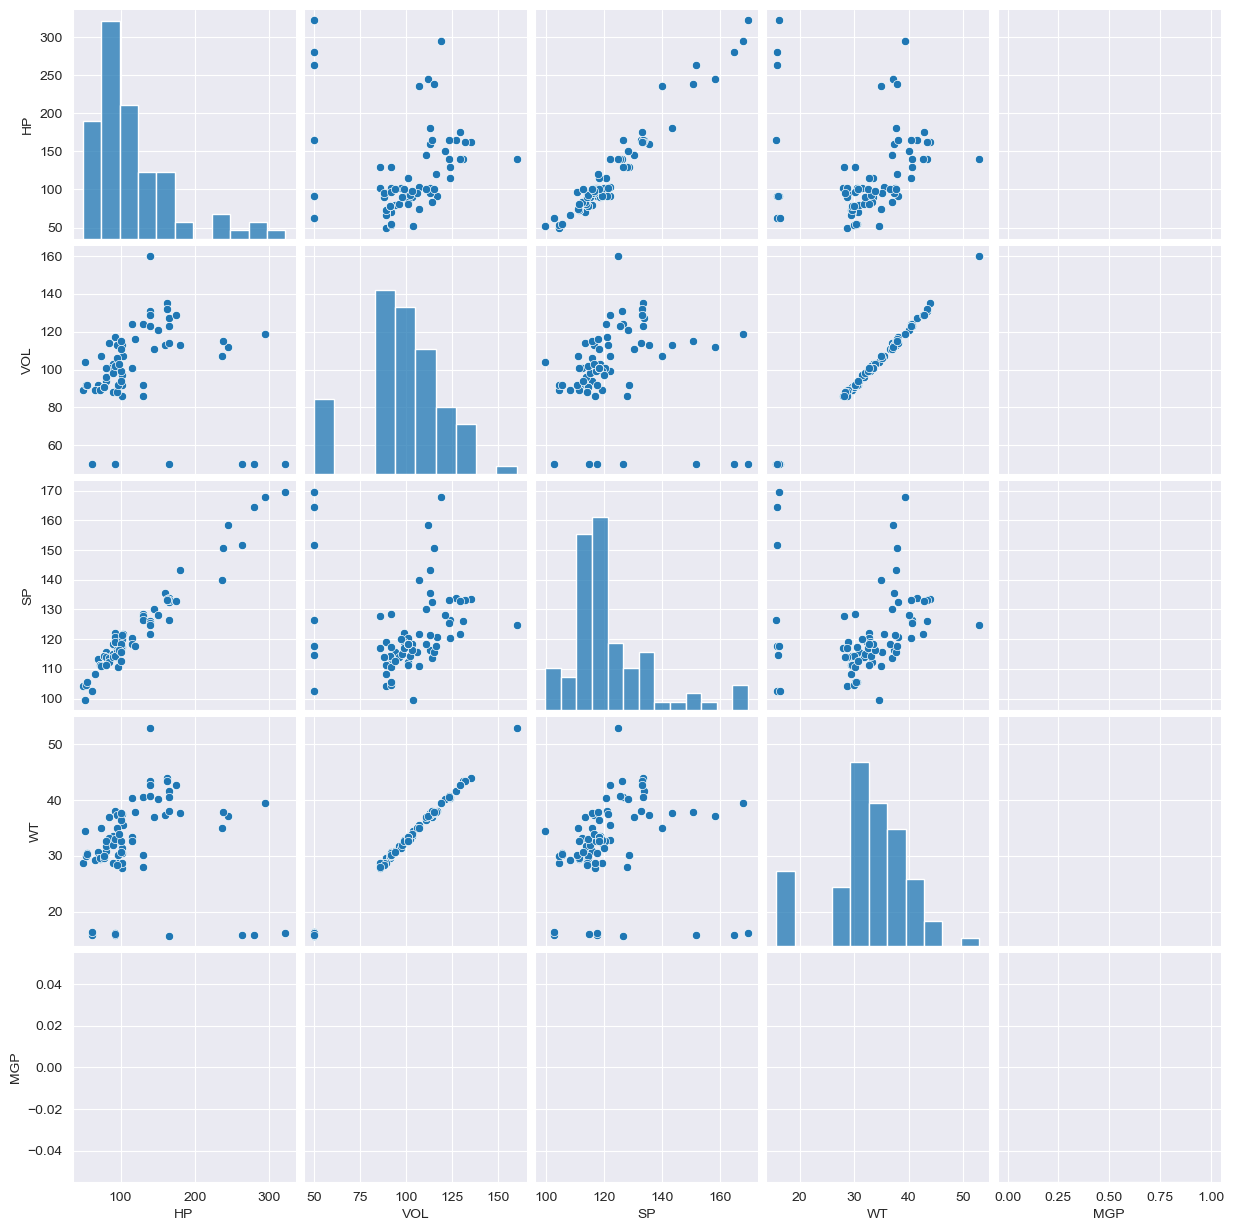

In [20]:
#pair plot
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [22]:
cars.corr()

,HP,VOL,SP,WT,MGP
HP,1.000000,0.077459,0.973848,0.076513,NaN
VOL,0.077459,1.000000,0.102170,0.999203,NaN
SP,0.973848,0.102170,1.000000,0.102439,NaN
WT,0.076513,0.999203,0.102439,1.000000,NaN
MGP,NaN,NaN,NaN,NaN,NaN


In [ ]:
OBSERVATIONS FROM CORRELATION PLOTS AND COEFFICENTS
- Between x and y all the x variables are showing moderate to high correlation strengths highest being between hp and mpg
- Therefore this dataset qualifiers for buliding a multiple linear regression model to predict mpg
- Among x columns (x1,x2,x3 and x4) some very high correlation strengths are observes between sp vs hp,vol vs wt
- The high correlation among x columns is not desirable as it might lead to multicollinearity problem

In [30]:
#Build a model
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

NameError: name 'smf' is not defined